### **Exploratory Data Analysis - Uber Case Study**

**By Solomon AKATAKPO (PhD.)**

Data Scientist/Analyst

**Context**

Ridesharing is a service that provides transportation on short notice. The market for ridesharing is highly volatile, with demand fluctuating widely based on factors such as time, location, weather, and local events. Success in this industry depends on the ability to identify patterns in these fluctuations and respond to demand in real-time.

**Objective**

Based in San Francisco, Uber Technologies, Inc. is a multinational transportation network company that operates in more than 785 metropolitan areas and serves over 110 million users worldwide. The aim of this project is to analyze the data and provide valuable insights that will contribute to the growth of the company.


**Key Questions**

a. What are the different variables that influence the number of pickups?

b. Which factor affects the number of pickups the most? What could be the possible reasons for that?

c. What are your recommendations to Uber management to capitalize on fluctuating demand?


# **Data Description**

The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

pickup_dt: Date and time of the pick-up

borough: NYC's borough

pickups: Number of pickups for the period (hourly)

spd: Wind speed in miles/hour

vsb: Visibility in miles to the nearest tenth

temp: Temperature in Fahrenheit

dewp: Dew point in Fahrenheit

slp: Sea level pressure

pcp01: 1-hour liquid precipitation

pcp06: 6-hour liquid precipitation

pcp24: 24-hour liquid precipitation

sd: Snow depth in inches

hday: Being a holiday (Y) or not (N)



**Step 1**

Importing the necessary libraries

In [1]:
#For reading data and data manipulation

import numpy as np
import pandas as pd

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Step 2**

Load data....but first connect google colab



In [2]:
#Mount drive to connect data folder in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Data**

In [3]:
data_uber = pd.read_csv('/content/drive/MyDrive/Uber_Case_Study_EDA/Uber_Data.csv')

In [4]:
#copy data to another variable to avoid any changes
df_uber = data_uber.copy()

**Step 3**

**Data overview**

In [5]:
# check first five rows
df_uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,01-01-2015 01:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,01-01-2015 01:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,01-01-2015 01:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,01-01-2015 01:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


The pickup_dt column contains the date and time of pickup

The borough column contains the name of the New York borough in which the pickup was made

The pickups column contains the number of pickups in the borough at the given time

Starting from spd to sd, all the columns are related to weather and are numerical in nature

The hday column indicates whether the day of the pickup is a holiday or not (Y: Holiday, N: Not a holiday)

**To check the shape of the dataset**

In [6]:
df_uber.shape

(29101, 13)

The dataset has 29,101 rows and 13 columns

**To check the data types for the different columns**

In [7]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


All the columns have 29,101 observations except borough and temp which has 26058 and 28742 observations indicating that there are some missing values in them

The pickup_dt column is being read as a 'object' data type but it should be in date-time format

The borough and hday columns are of object type while the rest of the columns are numerical in nature

The object type columns contain categories in them

**Understanding the statistical summary of the dataset**

In [8]:
df_uber.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,28742.0,47.900019,19.798783,2.0,32.0,46.5,65.000000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


There is a huge difference between the 3rd quartile and the maximum value for the number of pickups (pickups) and snow depth (sd) indicating that there might be outliers to the right in these variables

The temperature has a wide range indicating that data consists of entries for different seasons

**To check the count of each unique category in each of the categorical datasets. Categorical datasets are designated as 'object' type variables**

In [9]:
df_uber['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

**Observation**

There are 5 unique boroughs present in the dataset for New York (i.e.Bronx, Brooklyn, Manhattan, Queens, and Staten Island). The EWR is Newark Liberty Airport.

In [10]:
df_uber['hday'].unique()

array(['Y', 'N'], dtype=object)

Non holiday observations makes up around 96% when compared to holiday observations. This makes sense

In [11]:
df_uber['pickup_dt'].unique()

array(['01-01-2015 01:00', '01-01-2015 02:00', '01-01-2015 03:00', ...,
       '30-06-2015 21:00', '30-06-2015 22:00', '30-06-2015 23:00'],
      dtype=object)

pickup_dt needs to be converted from object data type to date-time format

In [12]:
df_uber['pickup_dt'] = pd.to_datetime(df_uber['pickup_dt'], format="%d-%m-%Y %H:%M")

Checking to satatype of all the columns again to confirm that the 'pickup_dt' was converted to date time

In [13]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


pickup_dt column has been successsfully changed to date-time format

The data now has 10 numerical columns, 2 object type columns and 1 date-time column.

To further understand the dataset, it is important to find the range of time that this data was collected

In [14]:
df_uber['pickup_dt'].min() #returns the start date

Timestamp('2015-01-01 01:00:00')

In [15]:
df_uber['pickup_dt'].max() #returns the end date

Timestamp('2015-06-30 23:00:00')

The data was collected from January 2015 to  June 2015.

Weather conditions during these time periods vary, and this is reflected in the statistical summary, as the temp columns shows a min of 2F and maximum of 89F

**Extracting date parts from pickup date**

Let's extract each piece of information from the pickup_dt column as a separate entity in order to analyze the trend of rides over time, as this column contains the combined information of date, month, year, and time of day.




In [16]:
df_uber['start_year'] = df_uber.pickup_dt.dt.year # extracting the year from the date
df_uber['start_month'] = df_uber.pickup_dt.dt.month_name() # extracting the month name from the date
df_uber['start_hour'] = df_uber.pickup_dt.dt.hour # extracting the hour from the time
df_uber['start_day'] = df_uber.pickup_dt.dt.day # extracting the day from the date
df_uber['week_day'] = df_uber.pickup_dt.dt.day_name() # extracting the day of the week from the date

pickup_dt column can now be removed since it 

In [17]:
# removing the pickup date column 
df_uber.drop('pickup_dt',axis=1,inplace=True)

Let's confirm if the changes hjave been applied

In [18]:
df_uber.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


**The changes have been applied to the dataset and pickup_dt column is no longer in the dataset**

Going further to check the statistical summary of the dataset


In [19]:
df_uber.describe(include='all').T 
# setting include='all' will get the statistical summary for both the numerical and categorical variables.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.0,NaN,NaN,NaN,490.215903,995.649536,0.0,1.0,54.0,449.0,7883.0
spd,29101.0,NaN,NaN,NaN,5.984924,3.699007,0.0,3.0,6.0,8.0,21.0
vsb,29101.0,NaN,NaN,NaN,8.818125,2.442897,0.0,9.1,10.0,10.0,10.0
temp,28742.0,NaN,NaN,NaN,47.900019,19.798783,2.0,32.0,46.5,65.0,89.0
dewp,29101.0,NaN,NaN,NaN,30.823065,21.283444,-16.0,14.0,30.0,50.0,73.0
slp,29101.0,NaN,NaN,NaN,1017.817938,7.768796,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101.0,NaN,NaN,NaN,0.00383,0.018933,0.0,0.0,0.0,0.0,0.28
pcp06,29101.0,NaN,NaN,NaN,0.026129,0.093125,0.0,0.0,0.0,0.0,1.24
pcp24,29101.0,NaN,NaN,NaN,0.090464,0.219402,0.0,0.0,0.0,0.05,2.1


The colllected data is from the year 2015 and covers 6 months i.e January - June

**Borough and temp columns have missing values in them. Let's treat the missing values**

**Missing value treatment**

Replacing with mean: This method involves imputing missing values with the mean of the column. However, the presence of outliers can influence the mean, and using this method in columns with outliers may result in incorrect imputations.

Replacing with median: This method involves imputing missing values with the median of the column. When dealing with columns that have outliers, the median is a suitable measure of central tendency for imputing missing values instead of the mean.

Replacing with mode: The mode of the column is used to impute missing values in this method. This approach is typically recommended for categorical data.

**Let's check how many missing values are present in each variable.**

In [20]:
# checking missing values across each columns
df_uber.isnull().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp            359
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

The borough and temp columns have 3043 and 359 missing values, respectively

There are no missing values in the other columns of the dataset

Checking to see the missing values of the Borough column

In [21]:
# Checking the missing values further
df_uber.borough.value_counts(normalize=True, dropna=False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

Tgere is no mode since all categories have thesame % count. We can also see that the % missing values is close to the % observation from other boroughs. The missing value can be treated as a separate category in this case

**suggestion here is to replace the null values present in the borough with the new label 'unknown'

In [22]:
#Replacing NaN with Unknown
df_uber['borough'].fillna('Unknown', inplace = True)

In [23]:
df_uber['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'Unknown'], dtype=object)

NaN has been replaced with the new label 'Unknown'

In [24]:
df_uber.isnull().sum()

borough          0
pickups          0
spd              0
vsb              0
temp           359
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
start_year       0
start_month      0
start_hour       0
start_day        0
week_day         0
dtype: int64

The missing value in the borough column have been treated. 

Moving on to temp column. Since this is a numerical variable, we can replace the missing values with the mean or median. Let us analyze the temp column in more detail

Let us pring the rown where temp is having missing values


In [25]:
df_uber.loc[df_uber['temp'].isnull()==True]

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
8,Brooklyn,1229,3.0,10.0,NaN,6.0,1023.0,0.0,0.0,0.0,0.0,Y,2015,January,2,1,Thursday
15,Brooklyn,1601,5.0,10.0,NaN,8.0,1022.3,0.0,0.0,0.0,0.0,Y,2015,January,3,1,Thursday
22,Brooklyn,1390,5.0,10.0,NaN,9.0,1022.0,0.0,0.0,0.0,0.0,Y,2015,January,4,1,Thursday
29,Brooklyn,759,5.0,10.0,NaN,9.0,1021.8,0.0,0.0,0.0,0.0,Y,2015,January,5,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Brooklyn,594,5.0,10.0,NaN,13.0,1016.2,0.0,0.0,0.0,0.0,N,2015,January,19,15,Thursday
2340,Brooklyn,620,5.0,10.0,NaN,13.0,1015.5,0.0,0.0,0.0,0.0,N,2015,January,20,15,Thursday
2347,Brooklyn,607,3.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,21,15,Thursday
2354,Brooklyn,648,9.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,22,15,Thursday


Its seems like the missing values in the temp coumn is from the month of January

To confirm this hypothesis, we print the unique boroughs and month names present for these missing values


In [26]:
df_uber.loc[df_uber['temp'].isnull()==True,'borough'].value_counts()

Brooklyn    359
Name: borough, dtype: int64

In [27]:
df_uber.loc[df_uber['temp'].isnull()==True,'start_month'].value_counts()

January    359
Name: start_month, dtype: int64

The missing values from temp column are from the Brooklyn borough and from the month of January

Let us check the dates in the month of January that there are missing values


In [28]:
df_uber.loc[df_uber['temp'].isnull()==True,'start_day'].unique() # days for which missing values are present

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [29]:
df_uber.loc[df_uber['start_month']=='January', 'start_day'].unique() # unique days in the month of January

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

There are issing data for the first 15 days out of the 31 days for which data was collected in January

From the statistical summary above, the mean and median are close to each other. The temperature of missing values can be computed using the mean temperature in the Brooklyn borough from 16th to 31st January

The fillna(): methood can be used

Syntax of fillna():  data['column'].fillna(value = x)

In [30]:
df_uber['temp'] = df_uber['temp'].fillna(value=df_uber.loc[df_uber['borough'] == 'Brooklyn','temp'].mean())

In [31]:
df_uber.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

The missing values have been treated

# **Exploratory Data Analysis**

# **Univariate Analysis**

**Exploring the numerical variables**

The use of univariate data visualization plots can aid in understanding the descriptive summary of a specific data variable. These plots provide insight into the distribution, dispersion, and location of observations within the data variable.

The distribution of observations can be checked using plots of **histogram** and **boxplots**

In [32]:
# Defining the function for creating boxplot and hisogram 
def boxplot_histogram(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

**Observations on pickups**

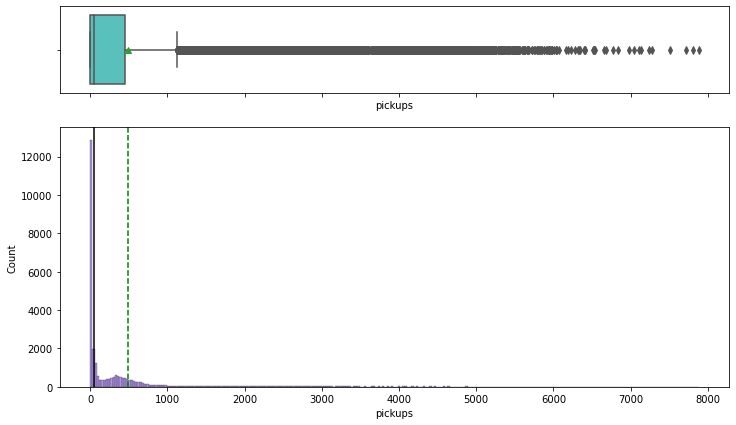

In [33]:
boxplot_histogram(df_uber, 'pickups')

The distribution of pickups is skewed to the right

this column contains lots of outliers

Number of pickups mostly at the lower end, there are pockets of high pickups

**Observations on visibility**

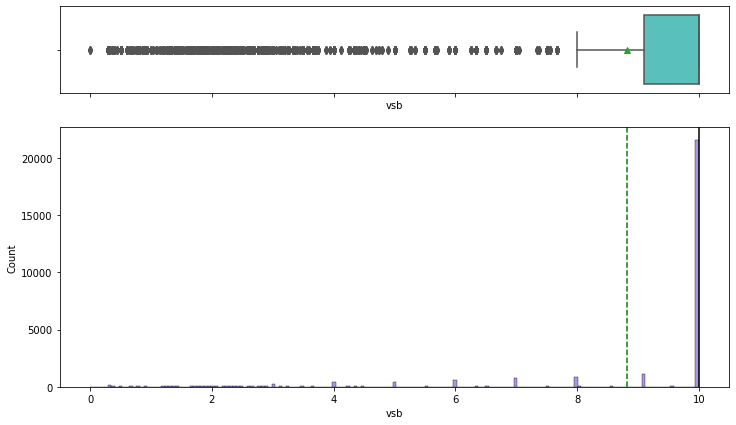

In [34]:
boxplot_histogram(df_uber, 'vsb')

The visibility column is left-skewed

High median and mean - visibility good on most days

Outlier on the lower tail indicates that visibility is extremely low on some days

Will be interesting to see how visibility impact pcikup frequency

**Observation on Temperature**

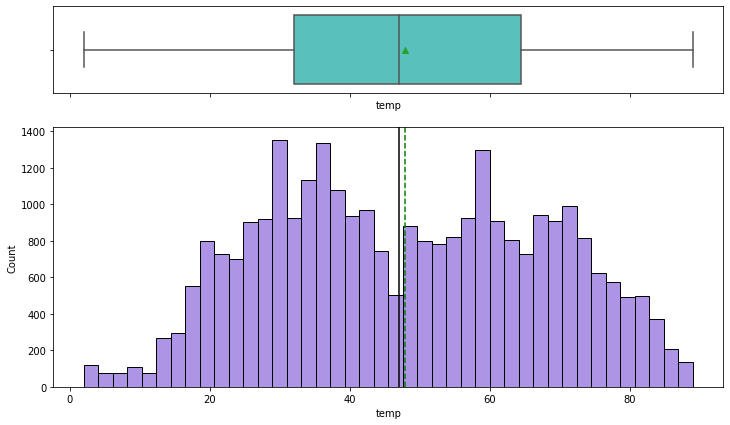

In [35]:
boxplot_histogram(df_uber, 'temp')

Temperature data does not have outleirs

50% of temperature values are less than 45F indicating clder weather

**Observation on dewpoint**

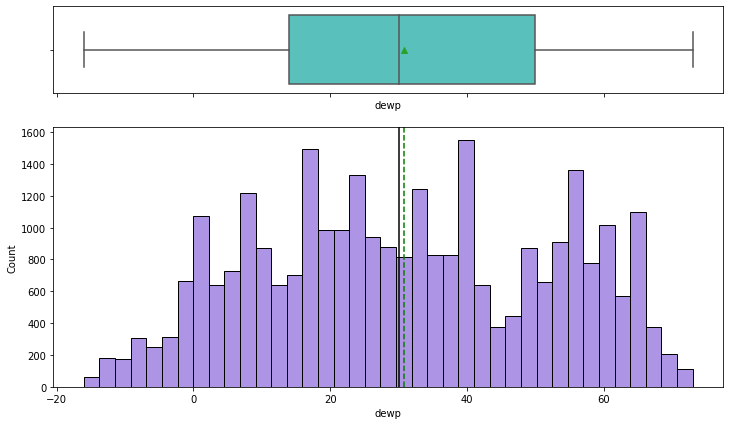

In [36]:
boxplot_histogram(df_uber, 'dewp')

No outliers for dewpoint

Dewpoint distribution similar is similar to temperature, suggesting correlation of these two variables

Dew point  is an indication of humidity  which is correlated with temperature



**Observations on Sea level pressure**

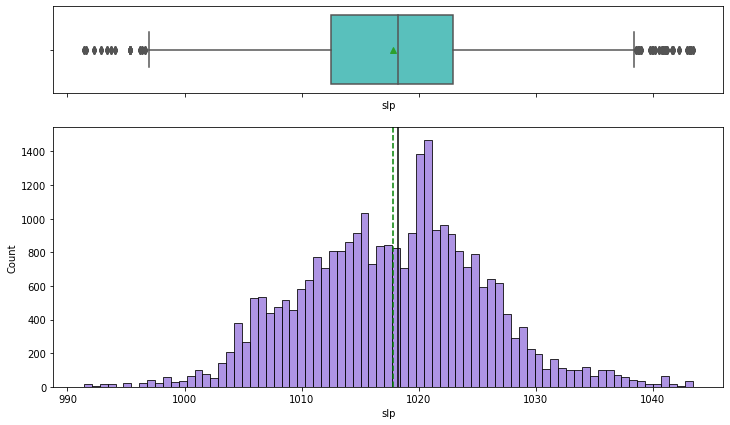

In [37]:
boxplot_histogram(df_uber, 'slp')

Close to normal distribution

There are a few outliers on both ends

**Observations on Liquid Precipitation (Rain)**

**1 hour liquid precipitation**



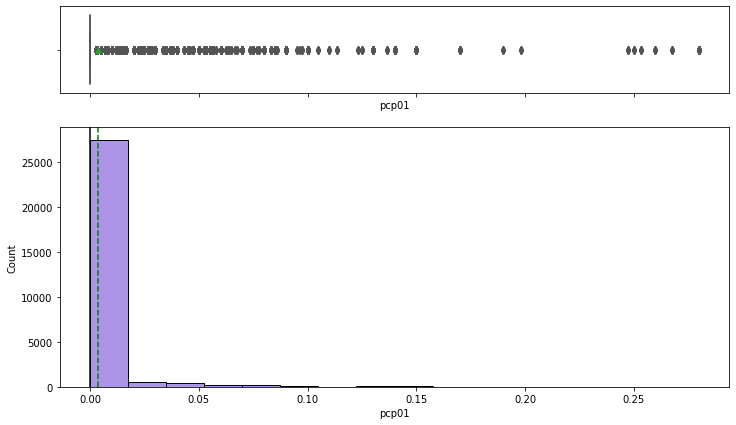

In [38]:
boxplot_histogram(df_uber, 'pcp01')

**6 hour liquid precipitation**

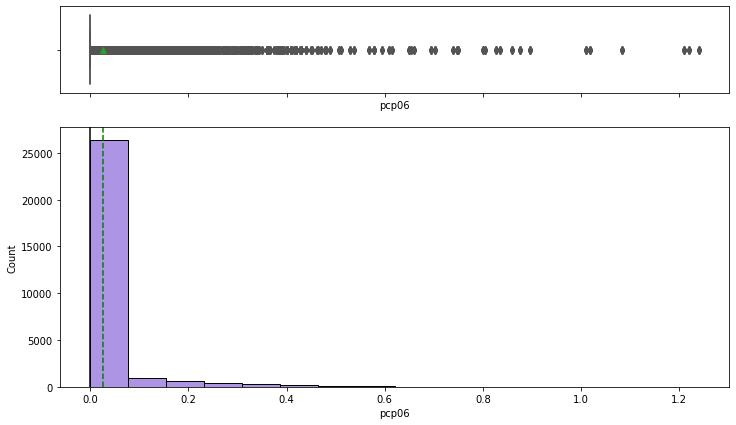

In [39]:
boxplot_histogram(df_uber, 'pcp06')

**24 hour liquid precipitation**

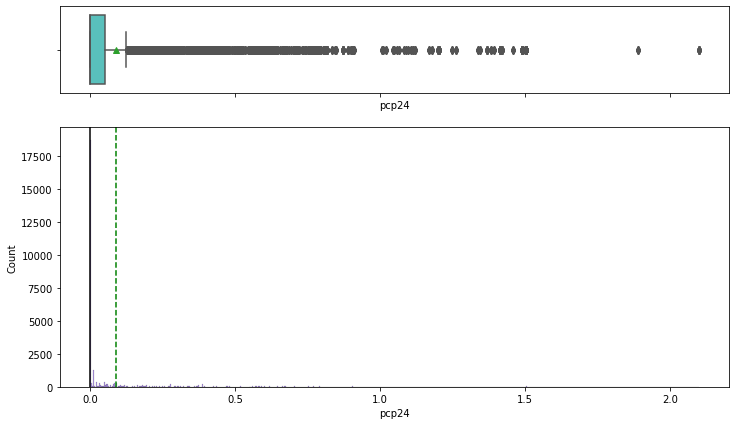

In [40]:
boxplot_histogram(df_uber, 'pcp24')

It rains relatively fewer days in New York

Most days are dry

Presence of outliers during heavy rain

**Observations on Snow Depth**

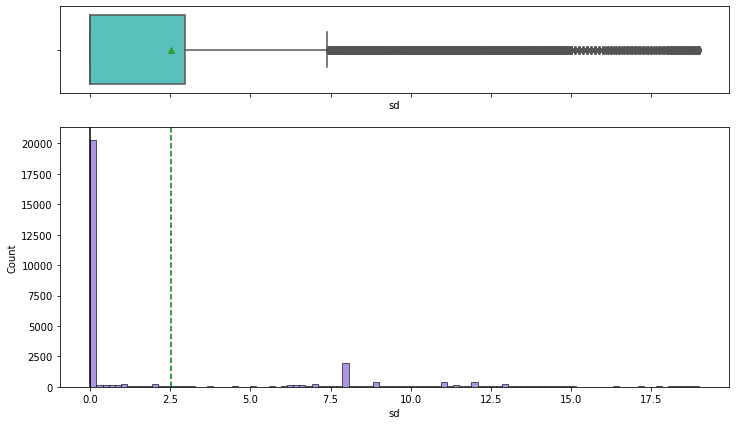

In [41]:
boxplot_histogram(df_uber, 'sd')

During the analyzed time period, snowfall was observed, and there are outliers in the data. It remains to be seen how the snowfall impacts pickups since it's probable that few people venture out during heavy snowfall, resulting in a decrease in pickups.

**categorical Variables**

Bar charts serve as a tool for investigating the distribution of categorical variables, where each category is depicted as a bar, and the bar's length indicates its corresponding numeric value.

**Observations on holiday**

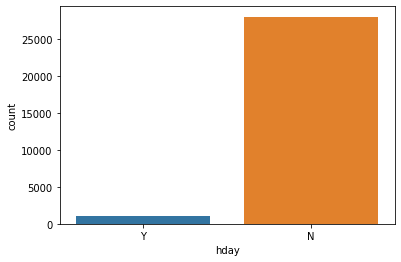

In [42]:
sns.countplot(data=df_uber,x='hday');

More pickups seen on non-holiday days than on hilidays

**Observations on borough**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'EWR'),
  Text(3, 0, 'Manhattan'),
  Text(4, 0, 'Queens'),
  Text(5, 0, 'Staten Island'),
  Text(6, 0, 'Unknown')])

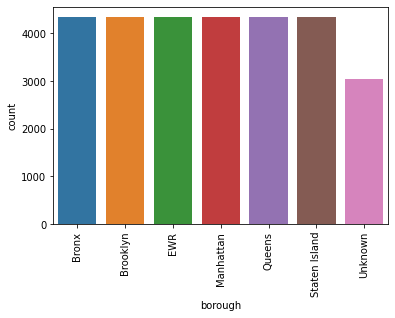

In [43]:
sns.countplot(data=df_uber,x='borough');
plt.xticks(rotation = 90)

With the exception of observations labeled as "Unknown" borough due to NaN values, the remaining observations exhibit a uniform distribution across the boroughs.

**Bivariate Analysis**

**Correlation by heatmap**

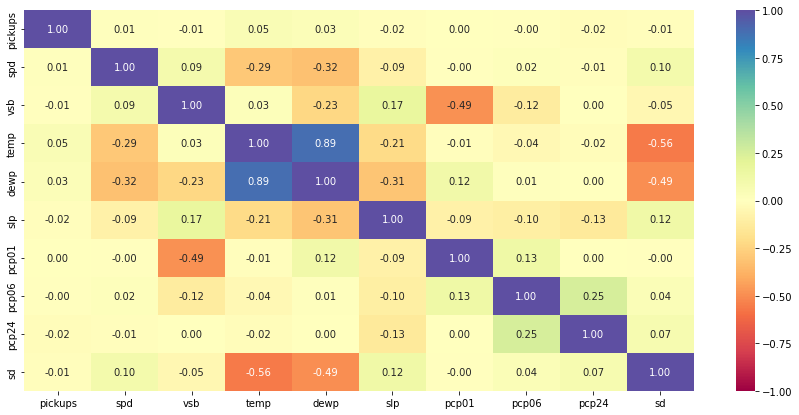

In [44]:
# Check for correlation among numerical variables
var_num = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']

corr = df_uber[var_num].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

As anticipated, there is a strong correlation between temperature and dew point. 

Precipitation is inversely correlated with visibility; when it's heavily raining, visibility tends to decrease, which is consistent with our intuition. 

As for snow depth, it's expected to have an inverse correlation with temperature. 

Furthermore, wind speed and sea level pressure are also negatively correlated with temperature. 

It's worth emphasizing that correlation does not necessarily imply causation. Additionally, there appears to be a weak link between the number of pickups and weather statistics.

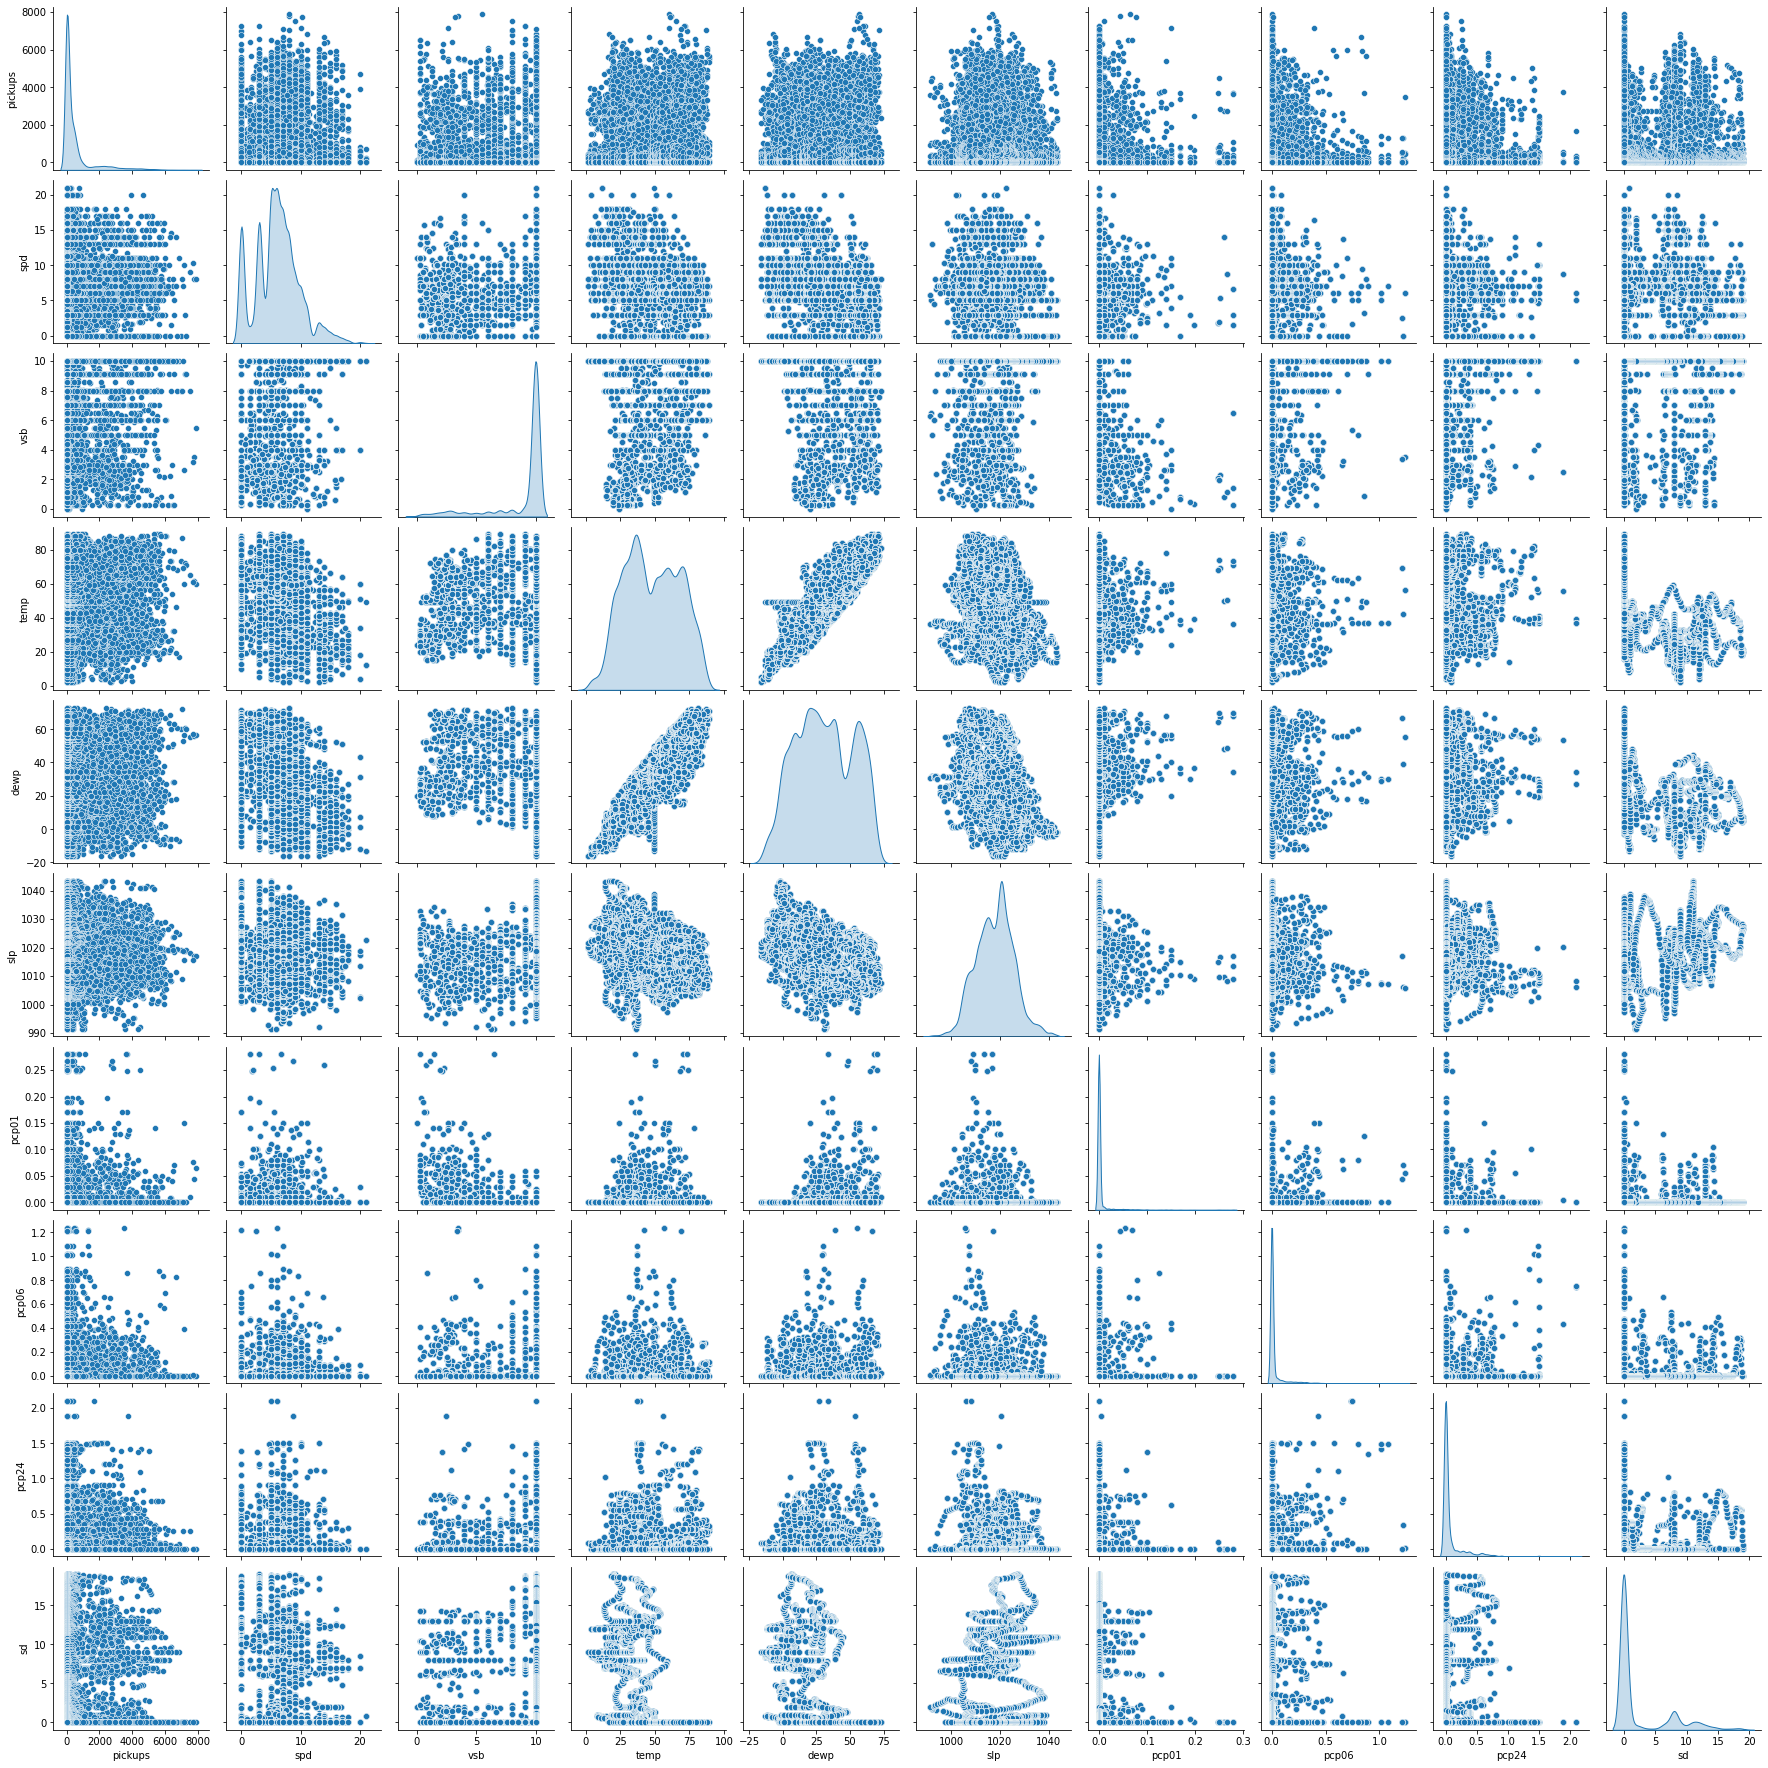

In [45]:
sns.pairplot(data=df_uber[var_num], diag_kind="kde")
plt.show()

The findings derived from the correlation plot align with those from the heat map,  indicating a lack of a robust connection between the number of pickups and weather conditions.

**To check the trend between pickups across different time based variables**

This can be done by plotting line charts. Line charts are often used to visualize a trend in data over intervals of time, thus the line is often drawn chronologically.

**Pickups across months**

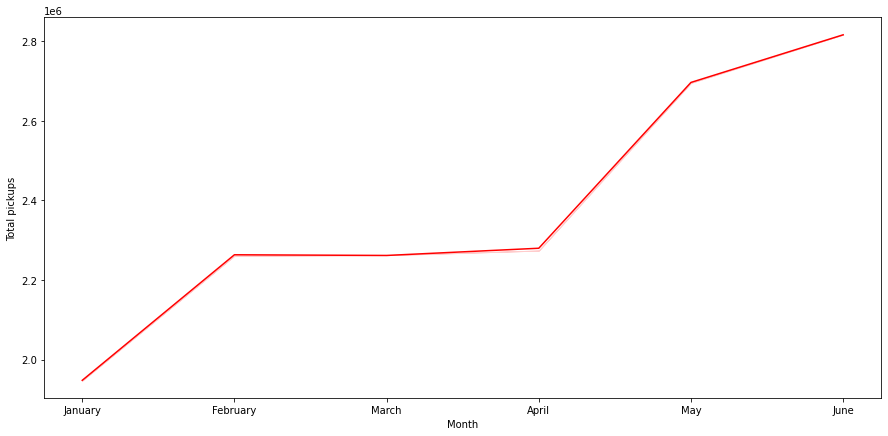

In [46]:
cats = df_uber.start_month.unique().tolist()
df_uber.start_month = pd.Categorical(df_uber.start_month, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df_uber, x="start_month", y="pickups", ci=False, color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

Increase in monthly pickups

June pickup almost 2.8 times that of January

**Pickups vs Days of the Month**

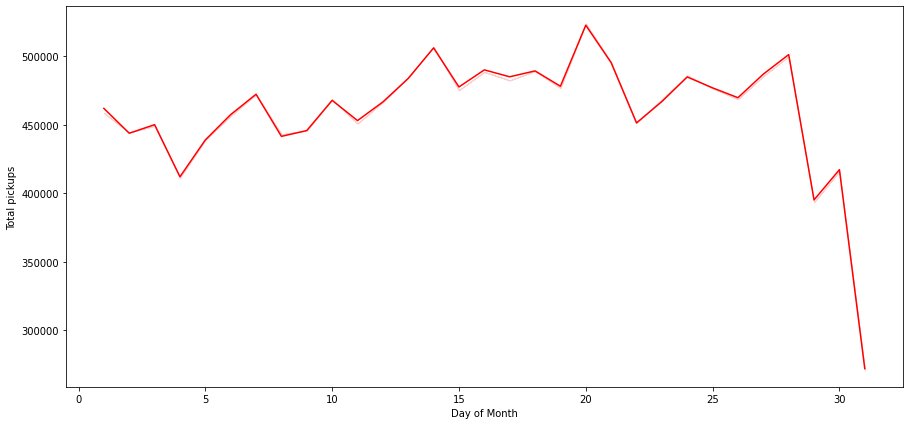

In [47]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_uber, x="start_day", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

decline in the number of bookings during the last days of the month

This can be attributed to February having just 28 days. Drop Feb and take a look at the plot again

There is a peak in booking around the 20th day of the month

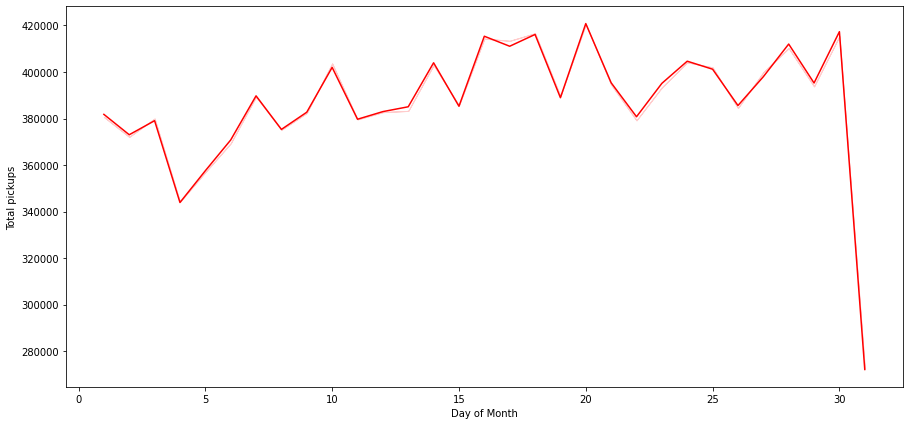

In [48]:
# Let us drop the Feb month and see the trend
data_without_Feb =  df_uber[df_uber['start_month'] != 'February']
plt.figure(figsize=(15,7))
sns.lineplot(data=data_without_Feb, x="start_day", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

The observation here is that there is a decline in the number of bookings towards the end of the month.

**Pickup across Hours of the Day**

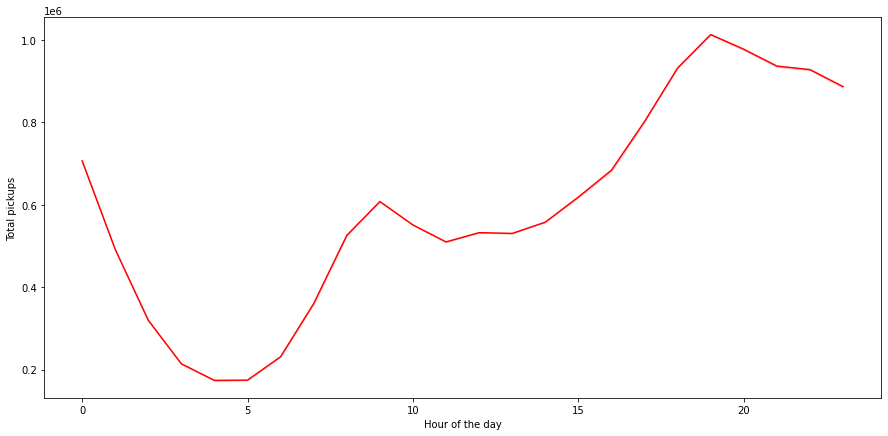

In [49]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_uber, x="start_hour", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

Bookings tend to reach their maximum point between the 19th and 20th hour of the day, which can be linked to the time when individuals finish work. 

From 5 AM onwards, there is a steady upward trend in pickups until 10 AM, which may be attributed to the morning office rush. 

Following this, there is a dip in pickups until 12 PM, after which they start to rise again.





**Pickup across Weekdays**

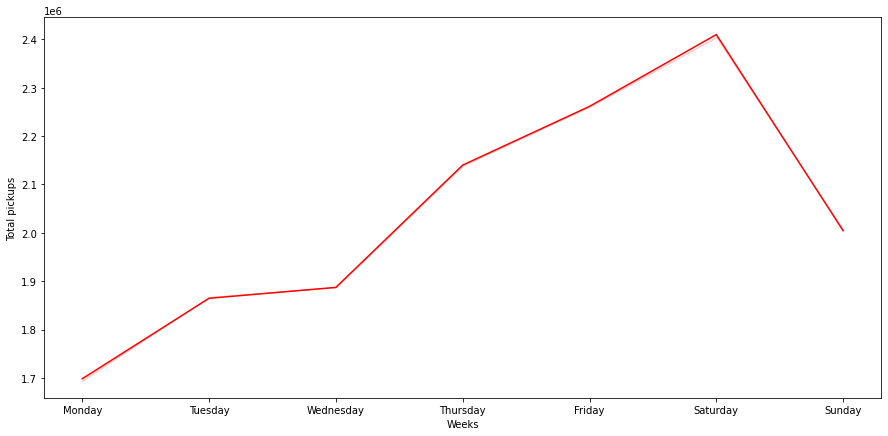

In [50]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df_uber.week_day = pd.Categorical(df_uber.week_day, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df_uber, x="week_day", y="pickups", ci=False, color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Weeks')
plt.show()

There is an increase in the number of reservation as the week progresses, and a sharp declkine on Sunday

More investigation needs to be done to understand why there is a decline in Uber pickups at the beginning of the week

**Is there any impact on number of pickups from the categorical variables**

**Pickups across Borough**

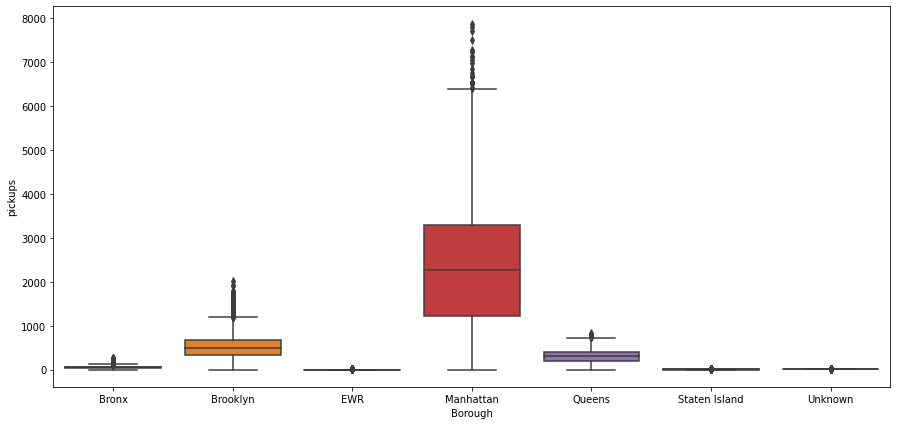

In [52]:
plt.figure(figsize=(15,7))           
sns.boxplot(x=df_uber['borough'], y=df_uber['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

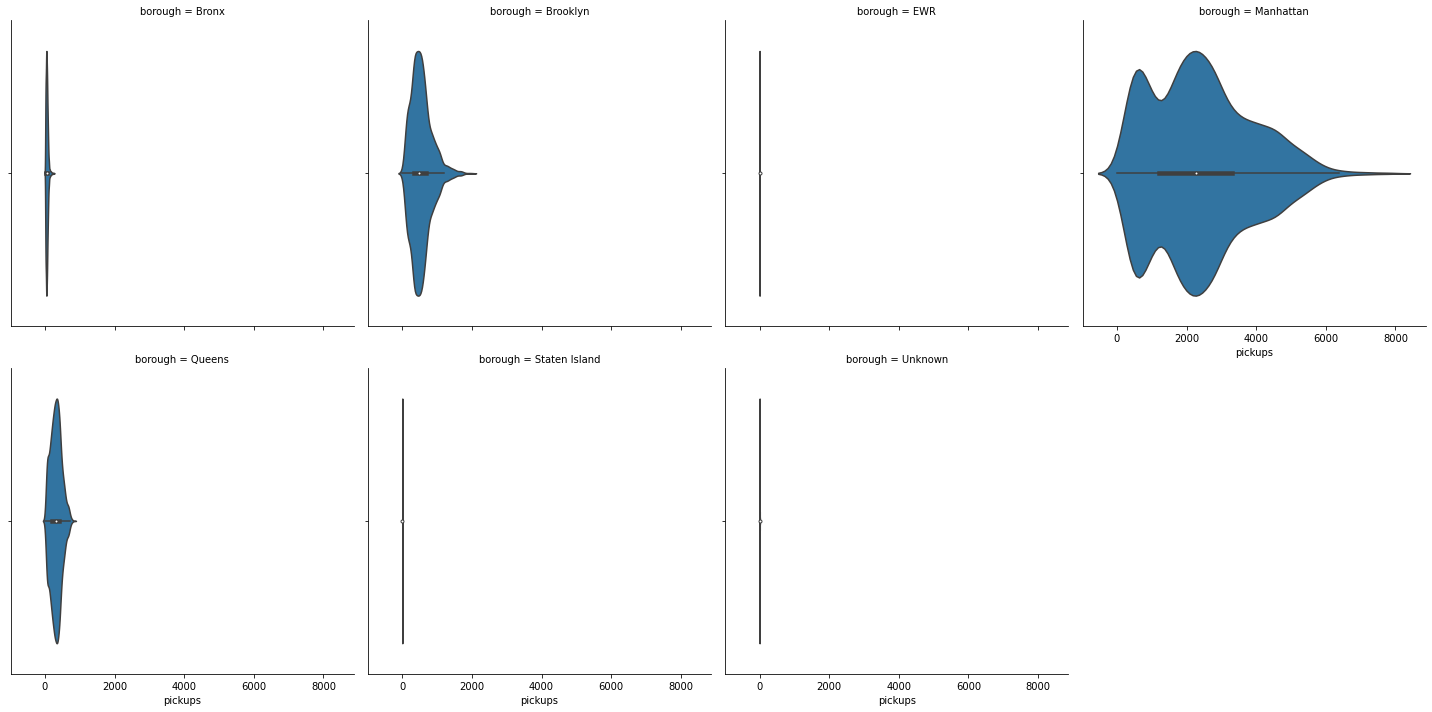

In [53]:
# Pickup dispersion in different borough
sns.catplot(x='pickups', col='borough', data=df_uber, col_wrap=4, kind="violin")
plt.show()

The number of riders varies significantly among the various boroughs. 

Manhattan boasts the highest number of bookings, while Brooklyn and Queens trail behind by a considerable margin.

On the other hand, EWR, Unknown, and Staten Island have a minimal number of bookings. The demand for these areas is so low that it could potentially be met by the drop-offs of incoming trips from other regions.

**Relationship between pickups and holidays**

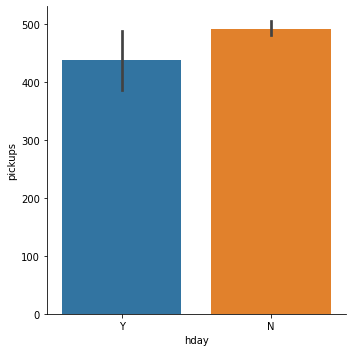

In [54]:
sns.catplot(x='hday', y='pickups', data=df_uber, kind="bar")
plt.show()

The mean pickup on a non-holiday is higher than on a holiday

**Multivariate Analysis**

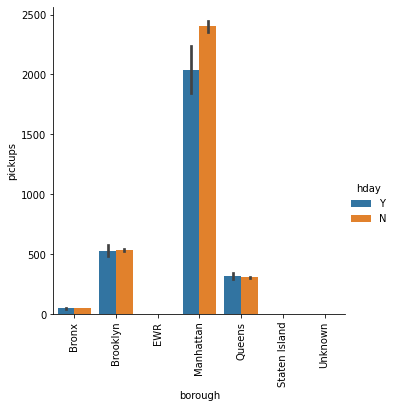

In [55]:
sns.catplot(x='borough', y='pickups', data=df_uber, kind="bar", hue='hday')
plt.xticks(rotation=90)
plt.show()

The bars for EWR, Staten Island and Unknown are not visible. Checking the mean pickups in all the borough will help to verify this.

In [56]:
# Check if the trend is similar across boroughs
df_uber.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

Except for Manhattan, the average pickups during holidays in all other boroughs are quite comparable to those on regular days. 

However, in Queens, the mean pickups on holidays are relatively higher. 

Notably, there are significantly fewer pickups in EWR.


Since we have seen that borough has a significant effect on the number of pickups, let's check if that effect is present across different hours of the day.

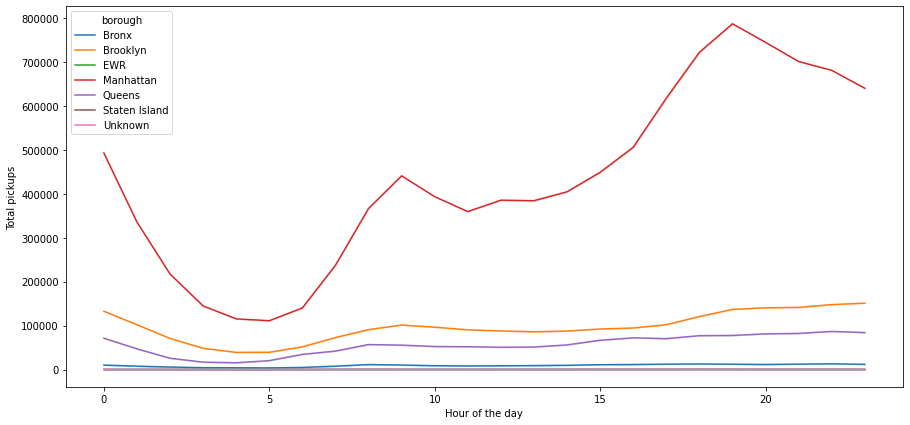

In [57]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_uber, x="start_hour", y="pickups", hue='borough', estimator='sum', ci=False)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()


The number of pickups in Manhattan is very high and dominant as shown in the spread across boroughs above.

The hourly trend observed earlier can be mainly attributed to the borough Manhattan, as rest of the other boroughs do not show any significant change for the number of pickups on the hourly basis





**Outlier Detection and Treatment**


**Let's visualize all the outliers present in data together**

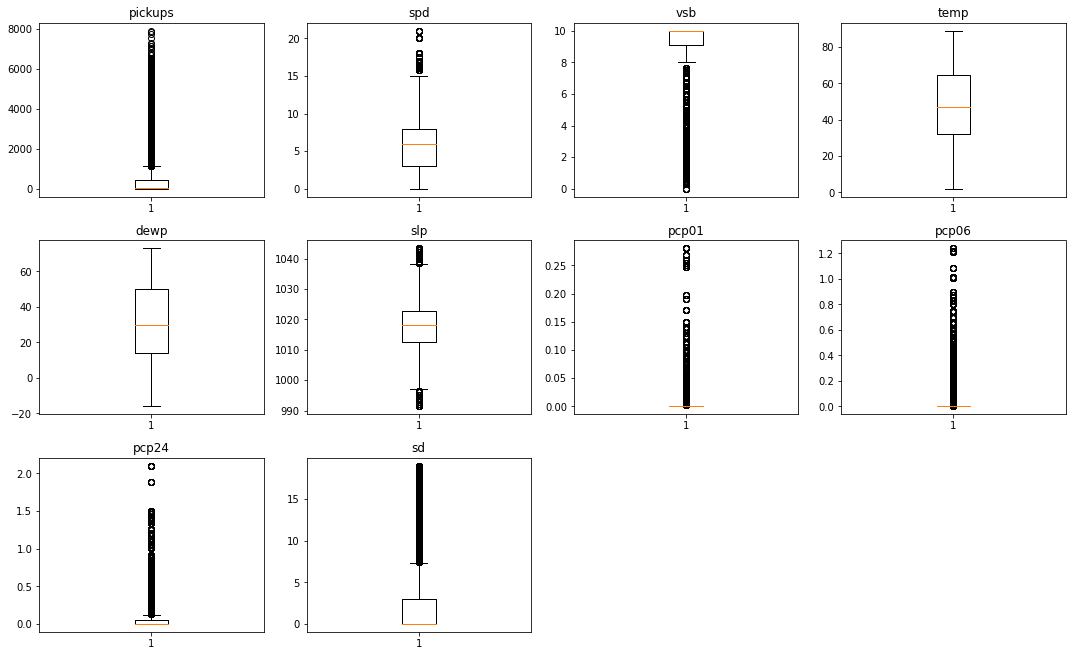

In [58]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
columns_numerical = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(columns_numerical):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_uber[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Although the pickups column contains many outliers and a wide range of values, it is highly recommended not to treat this column. This is because the number of pickups can legitimately vary widely, and we may miss some valid values if we were to adjust the outliers.**

**Columns from "spd" to "sd" all pertain to weather, and they do contain some outliers. However, we have determined that all of these outliers represent genuine values, and therefore we will not make any adjustments to them.**

**Actionable Insights and Recommendations**

**Insights**

Analysis of a dataset comprising almost 30,000 hourly Uber pickup records from various New York boroughs. The data covered every day of the first half of 2015, and the primary feature of interest was the number of pickups. From both environmental and business perspectives, it is inefficient to have cars roaming in one area when the demand is elsewhere or to flood the streets with cars during low-demand periods and face a shortage during peak hours. Hence, we aimed to identify the factors that impact pickups and the nature of their effects.

The following conclusions were drawn from the analysis

1.   Uber cabs are most popular in the Manhattan area of New York

2.   Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups

3. The demand for Uber has been increasing steadily over the months (Jan to June)

4. The rate of pickups is higher on the weekends as compared to weekdays

5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings

6. We can also conclude that people use Uber for regular office commutes.The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM

7. We need to further investigate the low demand for Uber on Mondays








**Recommendations**

1. Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential

2. There has been a gradual increase in Uber rides over the last few months and we need to keep up the momentum

3. The number of rides are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times

4. The demand for cabs is highest on Saturday nights. Cab availability must be ensured during this time of the week

5. Data should be procured for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas

6. More data should be procured on price and a model can be built that can predict optimal pricing

7. It would be great if Uber provides rides to/from the JFK Airport, LaGuardia Airport airports. This would rival other services that provide rides to/from the airports throughout the USA.

**Further Ananysis that can be done**

Dig deeper to explore the variation of cab demand, during working days and non-working days. You can combine Weekends+Holidays to be non-working days and weekdays to be the working days

Drop the boroughs that have negligible pickups and then analyze the data to uncover more insights
